In [1]:
!pip install scorecardpy
!pip install pingouin

     |████████████████████████████████| 55 kB 1.5 MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57843 sha256=fd1af775198a10d7a400cb930018550f4622cf404ac6a783014465d678018494
  Stored in directory: /root/.cache/pip/wheels/9d/50/52/715367c478fd2e2317070ccf6539b2c29fc8168144cfbfaeac
Successfully built scorecardpy
     |████████████████████████████████| 183 kB 4.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 9.8 MB 40.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=8644faf4e40fb9465054c6278c296f453139ef04d68a931d66662dc9028130ad
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=3307511e3e395cd677daf8bc40b1b6cf17b1acda035bf5a23354f329d6e7dde0
  Stored in directory: /root/.cache/pip/wheels/d6/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scorecardpy as sc
from sklearn import metrics
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# Missing Value Analysis and EDA

In [4]:
#Replace zero with np.na
#Since zero has no meaning in these variables
for i in df.index:
    if df.loc[i, 'Glucose'] == 0:
        df.loc[i, 'Glucose'] = np.nan
        
for i in df.index:
    if df.loc[i, 'BloodPressure'] == 0:
        df.loc[i, 'BloodPressure'] = np.nan
        
for i in df.index:
    if df.loc[i, 'SkinThickness'] == 0:
        df.loc[i, 'SkinThickness'] = np.nan
        
for i in df.index:
    if df.loc[i, 'Insulin'] == 0:
        df.loc[i, 'Insulin'] = np.nan
        
for i in df.index:
    if df.loc[i, 'BMI'] == 0:
        df.loc[i, 'BMI'] = np.nan

In [5]:
((df.isnull().sum() / df.shape[0])*100).to_frame().rename({0: 'Missing Values percentage'}, axis = 1).style.background_gradient('gist_heat_r')

In [6]:
# Because it is hard to know how to make up the values of insulin variable, we do not have enough knowledge of it
#Drop Insulin
df=df.drop('Insulin', axis=1)

#Replace with median for the rest
df.fillna(df.median(), inplace=True)

In [7]:
df.describe(include='all')

Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073   32.455208   
std       3.369578   30.438286      12.096642       8.791221    6.875177   
min       0.000000   44.000000      24.000000       7.000000   18.200000   
25%       1.000000   99.750000      64.000000      25.000000   27.500000   
50%       3.000000  117.000000      72.000000      29.000000   32.300000   
75%       6.000000  140.250000      80.000000      32.000000   36.600000   
max      17.000000  199.000000     122.000000      99.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

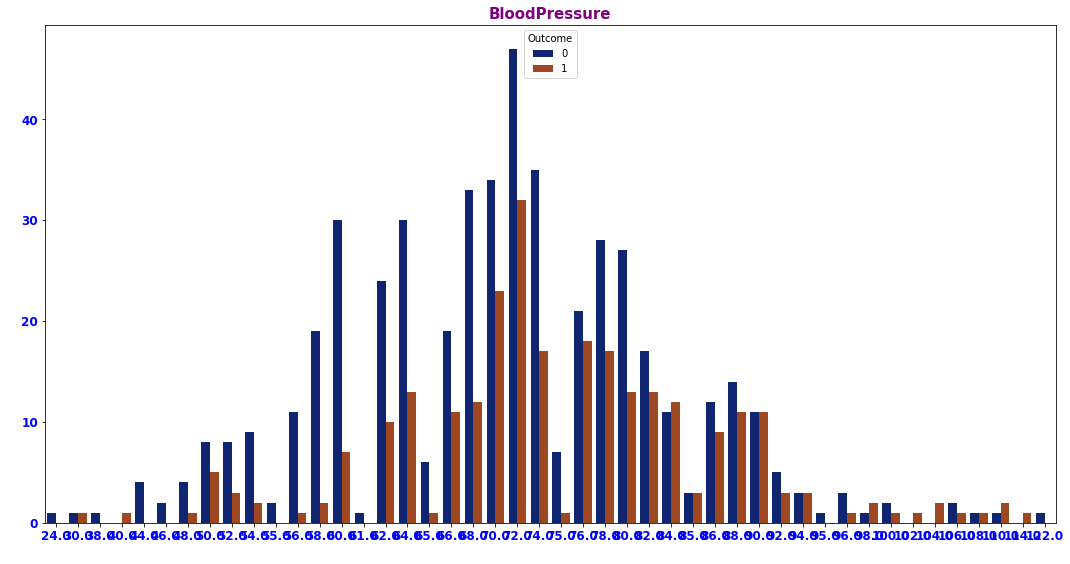

In [8]:
## Count plots of BloodPressure with hue as Outcome
plt.figure(figsize = (15,15))
for i,col in enumerate(['BloodPressure']):
  plt.subplot(2,1,i+1)
  sns.countplot(x = col,  data = df, hue = 'Outcome', palette = 'dark' )
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = 'purple')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'blue')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'blue')
  plt.tight_layout();

In [9]:
# Research Question

## People test positive in diabetes have higher blood pressure

In [10]:
m1,m2 = df.groupby('Outcome')['BloodPressure'].mean()


s1,s2 = df.groupby('Outcome')['BloodPressure'].std()

si1,si2 = df.groupby('Outcome')['BloodPressure'].size()

In [11]:

# two sample student t test
from scipy import stats
mean1 = m1
mean2 = m2 

std1 = s1
std2 = s2
​
nobs1 = si1
nobs2 = si2

modified_std1 = np.sqrt(np.float32(nobs1)/np.float32(nobs1-1)) * std1
modified_std2 = np.sqrt(np.float32(nobs2)/np.float32(nobs2-1)) * std2
​
(statistic, pvalue) = stats.ttest_ind_from_stats(mean1=mean1, std1=modified_std1, nobs1=si1, mean2=mean2, std2=modified_std2, nobs2=si2)
​
print( "t statistic is: ", statistic)
print("The p value is: ", pvalue)
​
## accept null hypothesis

SyntaxError: ignored

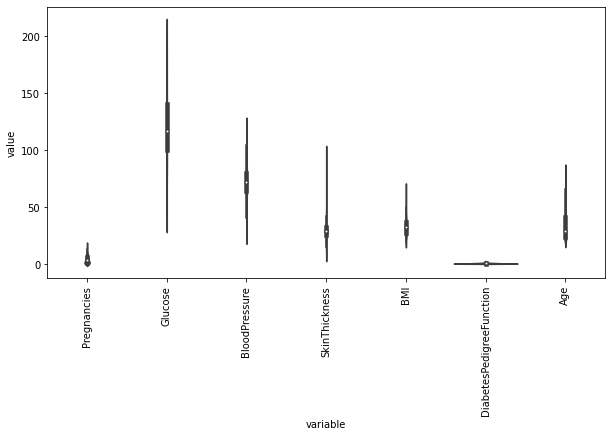

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(df.iloc[:, np.r_[0:7]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

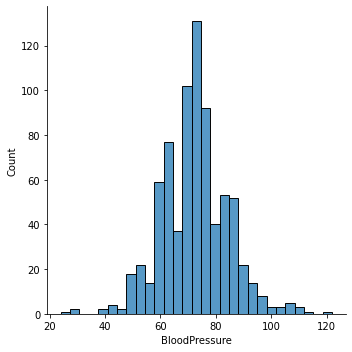

In [13]:
fig = sns.displot(df['BloodPressure'], kind = 'hist')
plt.show()

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,18))
for i in enumerate(df.drop(['Outcome'], axis = 1).columns):
  plt.subplot(4,2,i[0]+1)
  sns.kdeplot(data = df, x = i[1], hue = 'Outcome', fill = 'dark', palette = 'dark' )
  plt.xlabel(i[1],fontsize = 15)
  plt.ylabel(" ")
  plt.xticks(rotation = 45)  
  plt.tight_layout()

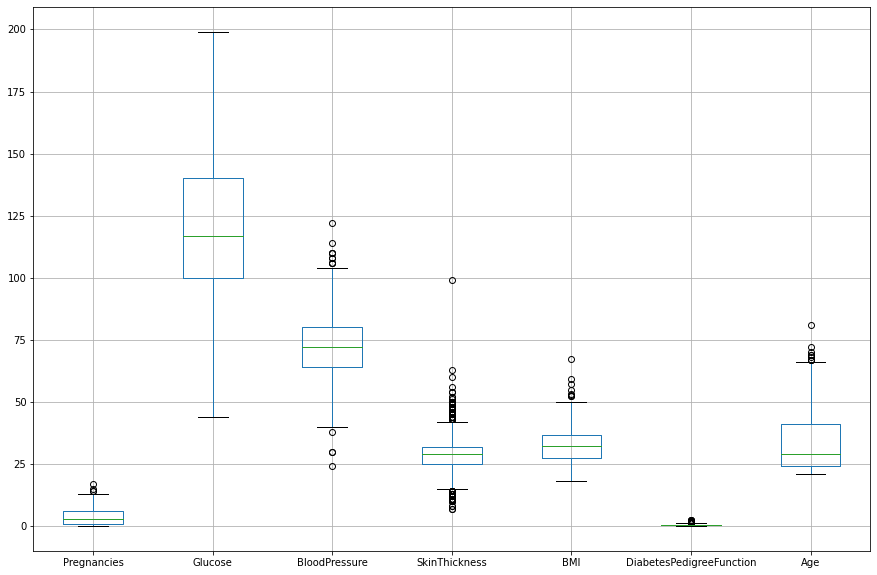

In [15]:
df.boxplot(column=['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age'], figsize=(15,10))

In [16]:
# since we do not want outliers we need to delete the obseravtions that are possibly outliers
df = df.loc[df['Pregnancies'] <= 12]

#Glucose does not have outliers

#Blood pressure have many outliers, but we will keep those outliers since they are just the real life situation and we want to make sure our model learn some of that

df = df.loc[df['SkinThickness'] < 50]
df = df.loc[df['SkinThickness'] >= 10]

#BMI
#From the distribution plot we noticed that there are very extreme outliers on the right side. 
#cut-off: 53
df = df.loc[df['BMI'] <= 50]

#DiabetesPedigreeFunction
#From distribution plot, extreme outliers on the right side. 
# cut-off: 1.2
df = df.loc[df['DiabetesPedigreeFunction'] <= 1.2]

#Age
#Even though the plot is very right skewed, we would do nothing to this variable. 80 years old still makes sense

In [17]:
df.describe(include='all')

Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   705.000000  705.000000     705.000000     705.000000  705.000000   
mean      3.714894  120.960284      72.140426      28.636879   32.021418   
std       3.099600   30.021888      11.811799       7.747346    6.373550   
min       0.000000   44.000000      24.000000      10.000000   18.200000   
25%       1.000000   99.000000      64.000000      25.000000   27.400000   
50%       3.000000  117.000000      72.000000      29.000000   32.000000   
75%       6.000000  139.000000      80.000000      32.000000   35.900000   
max      12.000000  198.000000     122.000000      49.000000   50.000000   

       DiabetesPedigreeFunction         Age     Outcome  
count                705.000000  705.000000  705.000000  
mean                   0.424583   33.065248    0.331915  
std                    0.246236   11.788320    0.471235  
min                    0.078000   21.000000    0.000000  
25%                    0.238000   24.000000    0.000000  
50%                    0.349000   29.000000    0.000000  
75%                    0.586000   40.000000    1.000000  
max                    1.191000   81.000000    1.000000

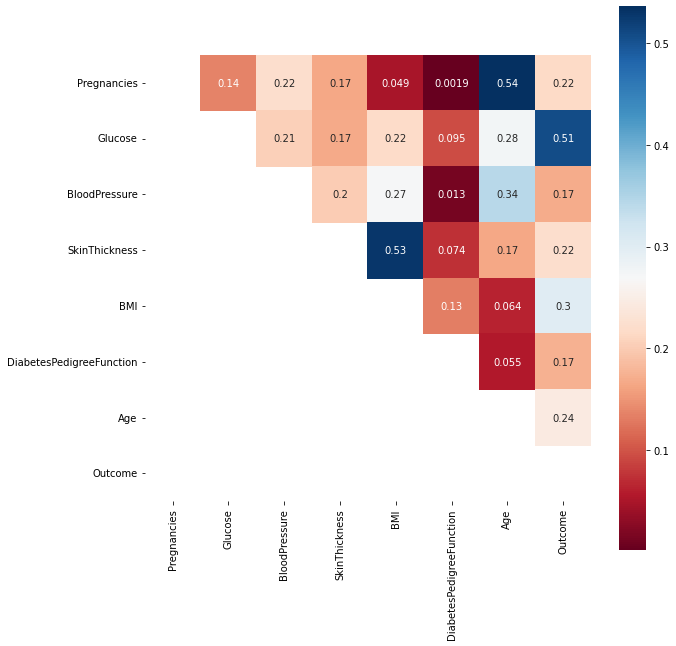

In [18]:
## Correlation Matrix
corr_matrix=df.corr()
 
matrix = np.tril(corr_matrix)

plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix.T, mask=matrix, square=True, cmap = 'RdBu', annot = True);

In [19]:
model1=smf.ols('BloodPressure~Pregnancies+Glucose+BMI+SkinThickness+DiabetesPedigreeFunction+Age+Outcome', data=df)
m1=model1.fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     23.09
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           2.98e-28
Time:                        20:37:11   Log-Likelihood:                -2667.0
No. Observations:                 705   AIC:                             5350.
Df Residuals:                     697   BIC:                             5387.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [20]:
import pingouin as pg

In [21]:
#post hoc test with pingouin
#cohen = effect size
pt = pg.pairwise_tukey(dv='BloodPressure',between='Outcome',effsize='cohen',data=df)
print(pt)

   A  B    mean(A)    mean(B)      diff        se         T   p-tukey    cohen
0  0  1  70.723992  74.991453 -4.267461  0.931566 -4.580953  0.000005 -0.36638


In [22]:
X = df[['BMI','Age']]
y = df['BloodPressure']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [23]:
mlregression=smf.ols('BloodPressure~BMI+Age+BMI:Age',data=df)
ss=mlregression.fit()
print(ss.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     54.08
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.88e-31
Time:                        20:37:18   Log-Likelihood:                -2667.2
No. Observations:                 705   AIC:                             5342.
Df Residuals:                     701   BIC:                             5361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.7164      5.985     10.146      0.0

In [24]:
mlregression=smf.ols('BloodPressure~BMI+Age',data=df)
new=mlregression.fit()
print(new.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     77.16
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           5.13e-31
Time:                        20:37:21   Log-Likelihood:                -2670.5
No. Observations:                 705   AIC:                             5347.
Df Residuals:                     702   BIC:                             5361.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.4270      2.299     20.194      0.0

In [25]:
y_pred = new.predict(X_test)

In [26]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 10.337187661771635


In [27]:
y_pred = new.predict(X_test)

In [28]:
df_pred = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_pred

Actual  Predicted
481    88.0  72.285867
486    62.0  72.221147
605    60.0  69.943952
392    64.0  64.320673
764    70.0  72.374252
..      ...        ...
524    58.0  68.974853
696    74.0  70.477967
318    66.0  73.306001
19     70.0  72.989810
293    48.0  73.110984

[141 rows x 2 columns]

In [ ]:
# ANOVA

In [29]:
#Anova table
anv=sm.stats.anova_lm(new, typ=2)
anv
## We now find that 

sum_sq     df          F        PR(>F)
BMI        6151.529266    1.0  53.630366  6.653668e-13
Age       10456.555642    1.0  91.162520  2.147643e-20
Residual  80521.052388  702.0        NaN           NaN

In [ ]:
#### We find that bloodpressure has no relationship with outcome but with age and bmi

In [30]:
!pip install dfply

     |████████████████████████████████| 612 kB 5.1 MB/s 


In [31]:
from dfply import *

ANCOVA analysis

In [32]:
df >> group_by(X.Outcome) >> summarize(n=X['BloodPressure'].count(), mean=X['BloodPressure'].mean(), std=X['BloodPressure'].std())

Outcome    n       mean        std
0        0  471  70.723992  11.889931
1        1  234  74.991453  11.142846

In [33]:
from pingouin import ancova
ancova(data=df, dv='BloodPressure', covar='Age', between='Outcome')

Source            SS   DF          F         p-unc       np2
0   Outcome    777.794411    1   6.356750  1.191389e-02  0.008974
1       Age   9479.314560    1  77.472441  1.039395e-17  0.099391
2  Residual  85894.787242  702        NaN           NaN       NaN

In [38]:

ancova(data=df, dv='BloodPressure', covar='BMI', between='Outcome')

Source            SS   DF          F         p-unc       np2
0   Outcome    847.135209    1   6.598089  1.041440e-02  0.009311
1       BMI   5243.628982    1  40.841099  3.008489e-10  0.054980
2  Residual  90130.472820  702        NaN           NaN       NaN

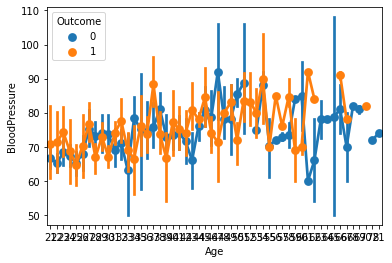

In [37]:
ax = sns.pointplot(x='Age', y='BloodPressure', hue='Outcome',data=df)

Power Analysis

In [34]:
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
from statsmodels.stats.power import TTestIndPower

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               705 non-null    int64  
 1   Glucose                   705 non-null    float64
 2   BloodPressure             705 non-null    float64
 3   SkinThickness             705 non-null    float64
 4   BMI                       705 non-null    float64
 5   DiabetesPedigreeFunction  705 non-null    float64
 6   Age                       705 non-null    int64  
 7   Outcome                   705 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 65.7 KB


In [40]:
# parameters for the analysis 
effect_size = 0.4
alpha = 0.05 # significance level
power = 0.9

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                              power = power, 
                              alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 132.31


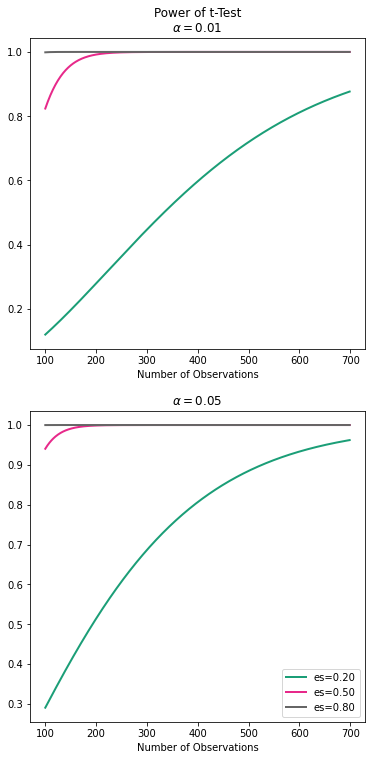

In [41]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                  nobs= np.arange(100, 700),
                  effect_size=np.array([0.2, 0.5, 0.8]),
                  alpha=0.01,
                  ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                 nobs= np.arange(100, 700),
                 effect_size=np.array([0.2, 0.5, 0.8]),
                 alpha=0.05,
                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 2.5)

In [36]:
def power_grid(x,y):
    power = TTestIndPower().solve_power(effect_size = x, 
                      nobs1 = y, 
                      alpha = 0.01)
    return power

X,Y = np.meshgrid(np.linspace(0.01, 1, 51), 
                  np.linspace(10, 1000, 100))
X = X.T
Y = Y.T

Z = power_grid(X, Y) # power

data = [Surface(x = X, y= Y, z = Z)]

layout = Layout(
    title='Power Analysis',
    scene = dict(xaxis = dict(title='effect size'),
                 yaxis = dict(title='number of observations'),
                 zaxis = dict(title='power'),)
)

fig = Figure(data=data, layout=layout)
iplot(fig)